### Resampling data and plotting it with pandas and Matplotlib 

We did our first data analysis with a large data set and saw how we could answer a research question based on a simple categorization. Although it produced good results, that sort of analysis is limited: it looks at the data at only one point in time. Analyzing data across time, on the other hand, allows us to look for trends and better understand the anomalies we encounter. By exploring the changes in data and isolating specific events, we can make meaningful connections between them. 

In 2017 and 2018, Twitter, Facebook, and Google were heavily criticized for allowing international agents to spread false or misleading content meant to influence public opinion in the US and abroad. This public scrutiny ultimately led to the publication of two major data bundles: one of Russian tweets that—according to Twitter, Congress, and various media reports— were used to manipulate the US media landscape, and another of Iranian tweets doing the same.

Our research question is straightforward: How many tweets related to Trump and Clinton were tweeted by Iranian actors over time? We’ll define Trump- and Clinton-related tweets as tweets that use hashtags containing the string `trump` or `clinton` (ignoring case).  

Here are the steps we need to take:
- Filter our data using a lambda function
- Format a data column into a datetime 
- Use the resample function
- plot the data with matplotlib


Let's start by important `pandas` and `matplotlib` (`import matplotlib.pyplot as plt`):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the csv file with the Iranian tweets. You can download them here and make sure you place the data into a `data` folder inside your project folder: [https://archive.org/details/iranian_tweets_csv_hashed/](https://archive.org/details/iranian_tweets_csv_hashed/)

In [2]:
%%time
tweets = pd.read_csv('../data/iranian_tweets_csv_hashed.csv')

CPU times: user 6.14 s, sys: 603 ms, total: 6.75 s
Wall time: 6.84 s


In [3]:
tweets.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,533622371429543936,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5757-ce...,[574356455],NaN
1,527205814906654721,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/top-news/10080-an-inqu...,[438542436],NaN
2,545166827350134784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/political/10404-cia-pr...,"[823905, 256625456]",NaN
3,538045437316321280,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5796-to...,[919513172],NaN
4,530053681668841472,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,2.0,NaN,[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...,[83864876],NaN


In [4]:
tweets.dtypes

tweetid                       int64
userid                       object
user_display_name            object
user_screen_name             object
user_reported_location       object
user_profile_description     object
user_profile_url             object
follower_count                int64
following_count               int64
account_creation_date        object
account_language             object
tweet_language               object
tweet_text                   object
tweet_time                   object
tweet_client_name            object
in_reply_to_tweetid         float64
in_reply_to_userid           object
quoted_tweet_tweetid        float64
is_retweet                     bool
retweet_userid               object
retweet_tweetid             float64
latitude                    float64
longitude                   float64
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_count               float64
hashtags                    

### Filter our data using a lambda function

We want a dataframe that contains only tweets relating to the 2016 presidential candidates. And we’re going to use a simple heuristic for this: include only tweets whose hashtags include the strings trump, clinton, or both. While this may not catch every tweet about Donald Trump or Hillary Clinton, it’s a clear-cut and easily understandable way to look at the activities of these misinformation agents.

For that we will:
- look for tweets that used hashtags containing the substrings `trump` or `clinton`
- filter down our data based on that condition

In [5]:
tweets['hashtags'].value_counts()

hashtags
[]                                                                                                     557800
[realiran]                                                                                               2912
[InternationalQudsDay2018, QudsDay4Return, SavePalestine, QudsDay2018, FreePalestine, DeleteIsrael]      2073
[Iran]                                                                                                   1828
[Realiran]                                                                                               1575
                                                                                                        ...  
[معیشت, آزادی, امنیت]                                                                                       1
[Netanyahu, zionazi, IOF]                                                                                   1
[Jews, Abortion]                                                                                            1
[

In [6]:
tweets['includes_trump_or_clinton'] = tweets['hashtags'].apply(lambda x: 'clinton' in str(x).lower() or 'trump' in str(x).lower())

In [7]:
tweets[tweets['includes_trump_or_clinton'] == True].head(100)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
394,964543820389109760,1394743334,RealProgressiveFront,RPFront,United States,“RPFront” is an NGO aims to support people’s m...,https://t.co/f3Ui2iVGkz,7099,921,2013-05-01,...,NaN,0.0,0.0,7.0,9.0,"[notmypresident, fucktrump]",[http://ift.tt/2CoNelW],NaN,NaN,True
417,842984240140763140,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,"Dallas, TX",Resist and Pray,NaN,2343,2088,2017-03-08,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Merkel, Outrageous, ObamaGate, WaterGate]",[],[2311561],NaN,True
426,951400129356951552,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,"California,Los Angeles",Journalist,https://t.co/LaseVK51H0,241,316,2018-01-10,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Jerusalem, USembassy, Trump, Wednesday...",[],[853233898398121984],NaN,True
432,946110924645109760,3683769196,Alwaght en Español,AlwaghtEs,NaN,NaN,http://t.co/tBLghK2kws,6817,4374,2015-09-17,...,NaN,0.0,0.0,0.0,0.0,"[Hezbolá, HAMAS, Trump, Quds]",[http://alwaght.com/es/news/120438],[3683769196],NaN,True
433,954617032972087296,853233898398121984,RiseAgainstTheRight,riseagainstr,"California, USA",RiseAgainstTheRight.,NaN,5839,5675,2017-04-15,...,NaN,0.0,0.0,6.0,3.0,"[TrumpShutdown, WSUlive, FridayFeeling, USWNT,...",[http://www.libertyfrontpress.com/fire-and-fur...,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,886474407643951104,1803a95a0ab8963650589f13672df24b04f51db32cf950...,1803a95a0ab8963650589f13672df24b04f51db32cf950...,1803a95a0ab8963650589f13672df24b04f51db32cf950...,United States,As an independent news media organization we a...,https://t.co/Q6sWkeqyPp,4581,5257,2017-05-28,...,NaN,0.0,0.0,0.0,0.0,"[trump, notrump, talking, brain]",[],[853144291560042496],NaN,True
5824,886197248299630592,e8f265f960bea2dd38b3f8d9e913a0cb07ba40c8a3f766...,e8f265f960bea2dd38b3f8d9e913a0cb07ba40c8a3f766...,e8f265f960bea2dd38b3f8d9e913a0cb07ba40c8a3f766...,United States,NaN,NaN,340,680,2017-07-06,...,NaN,0.0,0.0,0.0,0.0,"[trump, county, racist, Nationalist, notrump, ...",[],[853144291560042496],NaN,True
6026,902608026019999745,08f8ce1bb73af31bdf6b4711959433d96fc08d42027e29...,08f8ce1bb73af31bdf6b4711959433d96fc08d42027e29...,08f8ce1bb73af31bdf6b4711959433d96fc08d42027e29...,NaN,Para decir las verdades silenciosas del mundo ...,NaN,4185,3815,2016-08-26,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Nieto, muro]",[],[08f8ce1bb73af31bdf6b4711959433d96fc08d42027e2...,NaN,True
6051,904595717917900800,1803a95a0ab8963650589f13672df24b04f51db32cf950...,1803a95a0ab8963650589f13672df24b04f51db32cf950...,1803a95a0ab8963650589f13672df24b04f51db32cf950...,United States,As an independent news media organization we a...,https://t.co/Q6sWkeqyPp,4581,5257,2017-05-28,...,NaN,0.0,0.0,0.0,0.0,"[law, ImpeachTrump, whitehouse]",[],[853144291560042496],NaN,True


In [8]:
tweets_subset = tweets[tweets['includes_trump_or_clinton'] == True]

### Resampling our data over time

To get a tally of these tweets over time we need to:
- format a column as a date time
- set the index of our dataframe to this date time column
- resample our dataframe 

In [9]:
tweets_subset.dtypes

tweetid                        int64
userid                        object
user_display_name             object
user_screen_name              object
user_reported_location        object
user_profile_description      object
user_profile_url              object
follower_count                 int64
following_count                int64
account_creation_date         object
account_language              object
tweet_language                object
tweet_text                    object
tweet_time                    object
tweet_client_name             object
in_reply_to_tweetid          float64
in_reply_to_userid            object
quoted_tweet_tweetid         float64
is_retweet                      bool
retweet_userid                object
retweet_tweetid              float64
latitude                     float64
longitude                    float64
quote_count                  float64
reply_count                  float64
like_count                   float64
retweet_count                float64
h

In [10]:
tweets_subset['tweet_time'] = tweets_subset['tweet_time'].astype('datetime64[ns]')

/var/folders/jd/xh6_sk3x1rqbfpp2msvvkstm0000gp/T/ipykernel_12440/2943695251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_subset['tweet_time'] = tweets_subset['tweet_time'].astype('datetime64[ns]')


In [11]:
tweets_subset.dtypes

tweetid                               int64
userid                               object
user_display_name                    object
user_screen_name                     object
user_reported_location               object
user_profile_description             object
user_profile_url                     object
follower_count                        int64
following_count                       int64
account_creation_date                object
account_language                     object
tweet_language                       object
tweet_text                           object
tweet_time                   datetime64[ns]
tweet_client_name                    object
in_reply_to_tweetid                 float64
in_reply_to_userid                   object
quoted_tweet_tweetid                float64
is_retweet                             bool
retweet_userid                       object
retweet_tweetid                     float64
latitude                            float64
longitude                       

In [12]:
tweets_over_time = tweets_subset.set_index('tweet_time')
tweets_over_time.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
tweet_time,,,,,,,,,,,,,,,,,,,,,
2018-02-16 16:55:00,964543820389109760,1394743334,RealProgressiveFront,RPFront,United States,“RPFront” is an NGO aims to support people’s m...,https://t.co/f3Ui2iVGkz,7099,921,2013-05-01,...,NaN,0.0,0.0,7.0,9.0,"[notmypresident, fucktrump]",[http://ift.tt/2CoNelW],NaN,NaN,True
2017-03-18 06:21:00,842984240140763140,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,"Dallas, TX",Resist and Pray,NaN,2343,2088,2017-03-08,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Merkel, Outrageous, ObamaGate, WaterGate]",[],[2311561],NaN,True
2018-01-11 10:27:00,951400129356951552,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,"California,Los Angeles",Journalist,https://t.co/LaseVK51H0,241,316,2018-01-10,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Jerusalem, USembassy, Trump, Wednesday...",[],[853233898398121984],NaN,True
2017-12-27 20:09:00,946110924645109760,3683769196,Alwaght en Español,AlwaghtEs,NaN,NaN,http://t.co/tBLghK2kws,6817,4374,2015-09-17,...,NaN,0.0,0.0,0.0,0.0,"[Hezbolá, HAMAS, Trump, Quds]",[http://alwaght.com/es/news/120438],[3683769196],NaN,True
2018-01-20 07:30:00,954617032972087296,853233898398121984,RiseAgainstTheRight,riseagainstr,"California, USA",RiseAgainstTheRight.,NaN,5839,5675,2017-04-15,...,NaN,0.0,0.0,6.0,3.0,"[TrumpShutdown, WSUlive, FridayFeeling, USWNT,...",[http://www.libertyfrontpress.com/fire-and-fur...,NaN,NaN,True


In [13]:
tweet_tally = tweets_over_time.resample('M').count()
tweet_tally.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
tweet_time,,,,,,,,,,,,,,,,,,,,,
2013-08-31,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,0,1
2013-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,0,0,2
2013-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
monthly_tweet_count = tweet_tally['tweetid']
monthly_tweet_count.head()

tweet_time
2013-08-31    1
2013-09-30    0
2013-10-31    0
2013-11-30    2
2013-12-31    0
Freq: M, Name: tweetid, dtype: int64

### Plot your data 

Now it's time to plot your data to better understand trends over time!

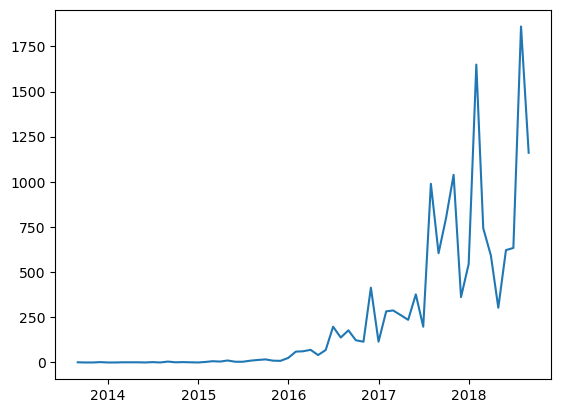

In [15]:
plt.plot(monthly_tweet_count)

In [16]:
len(tweets['tweetid'])

1122936

In [17]:
len(tweets)

1122936

### Modifying your chart

First, there are so many ways to do the same thing:

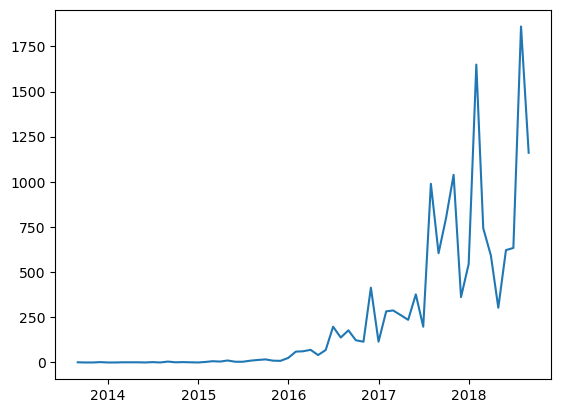

In [18]:
plt.plot(monthly_tweet_count)

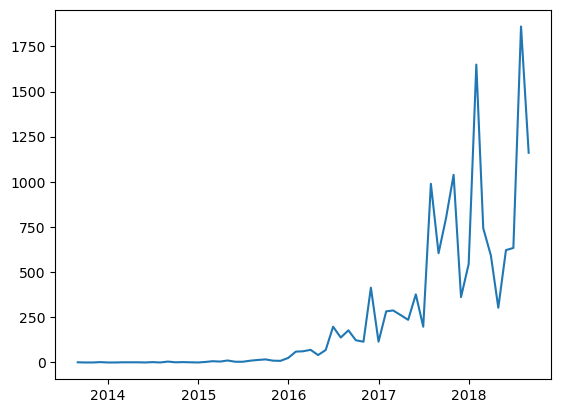

In [19]:
fig, ax = plt.subplots()  # Create a figure containing a single axes (using a different function)
ax.plot(monthly_tweet_count)

<Axes: xlabel='tweet_time'>

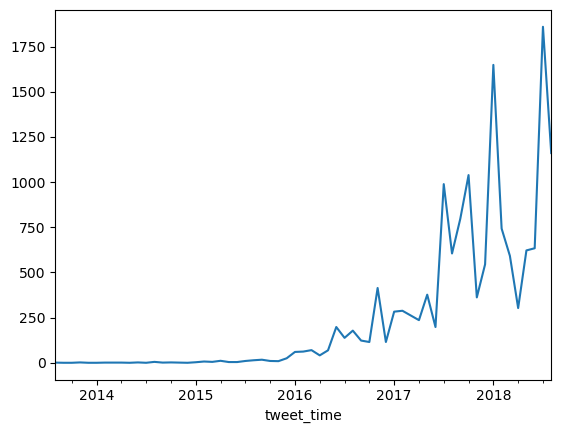

In [20]:
monthly_tweet_count.plot()

#### Labeling your charts

Text(0.5, 1.0, 'Tweets about Clinton or Trump from Iranian bots')

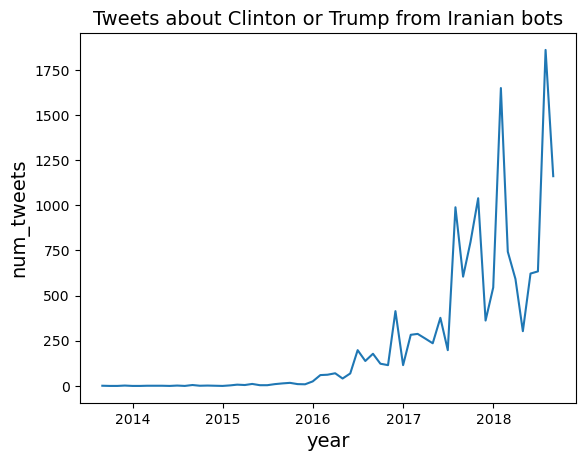

In [21]:
fig, ax = plt.subplots()
ax.plot(monthly_tweet_count)
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('num_tweets', fontsize=14)
ax.set_title('Tweets about Clinton or Trump from Iranian bots', fontsize=14)


#### Changing the size of your chart

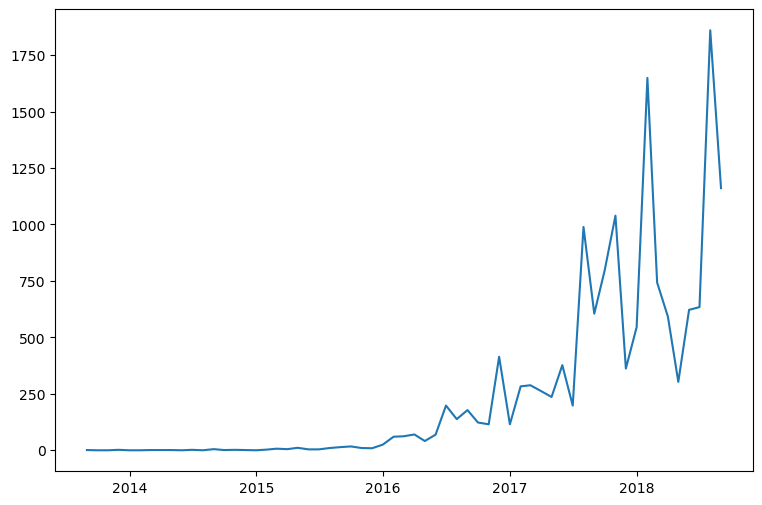

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(monthly_tweet_count)


#### Other chart types

##### Bar Charts

In [23]:
ranked_names = tweets["user_screen_name"].value_counts()
ranked_names_top10 = ranked_names[0:9].reset_index()
print(len(ranked_names_top10))
ranked_names_top10.head()

9


,user_screen_name,count
0,marialuis91,265448
1,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,101956
2,yedisabah,68808
3,74e1fd475aa82e2aad49acb0c5cf01984f8ecb755509d8...,34010
4,cfb431d28838bc87b3473081cc5899cfede8252c201564...,28320


<Axes: ylabel='user_screen_name'>

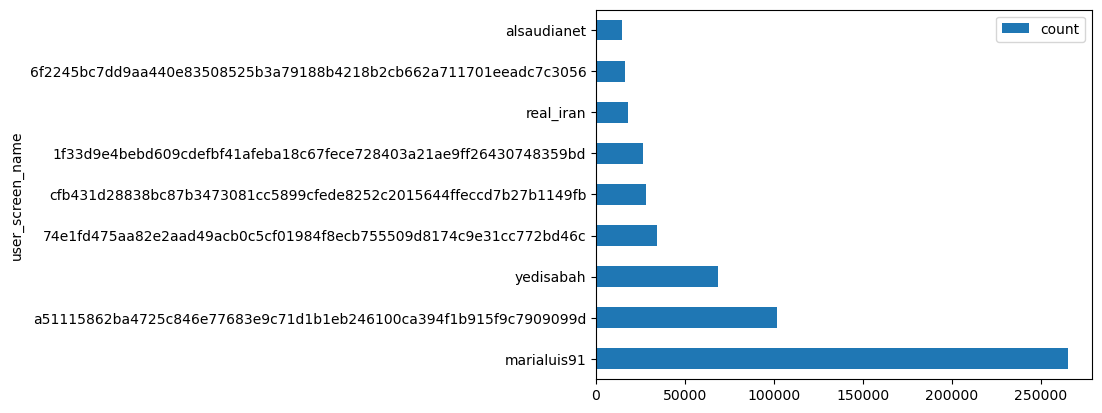

In [29]:
ranked_names_top10.plot(y="count", x="user_screen_name", kind="barh")

##### pie charts

([<matplotlib.patches.Wedge at 0x7fb0a735c640>,
 [Text(0.12919814779878006, 1.0923863046584594, 'marialuis91'),
  Text(-1.0432343083031852, -0.3488010578813876, 'a51115862ba4725c846e77683e9c71d1b1eb246100ca394f1b915f9c7909099d'),
  Text(-0.33908935771851856, -1.0464312722209914, 'yedisabah'),
  Text(0.2715716981775616, -1.0659497233683002, '74e1fd475aa82e2aad49acb0c5cf01984f8ecb755509d8174c9e31cc772bd46c'),
  Text(0.6125996644761111, -0.9136310256792708, 'cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb'),
  Text(0.8556396183939009, -0.6912892617672719, '1f33d9e4bebd609cdefbf41afeba18c67fece728403a21ae9ff26430748359bd'),
  Text(0.9966086209196889, -0.4655870022976973, 'real_iran'),
  Text(1.0658440916090082, -0.27198597828227916, '6f2245bc7dd9aa440e83508525b3a79188b4218b2cb662a711701eeadc7c3056'),
  Text(1.0964989124531508, -0.08769341474168776, 'alsaudianet')])

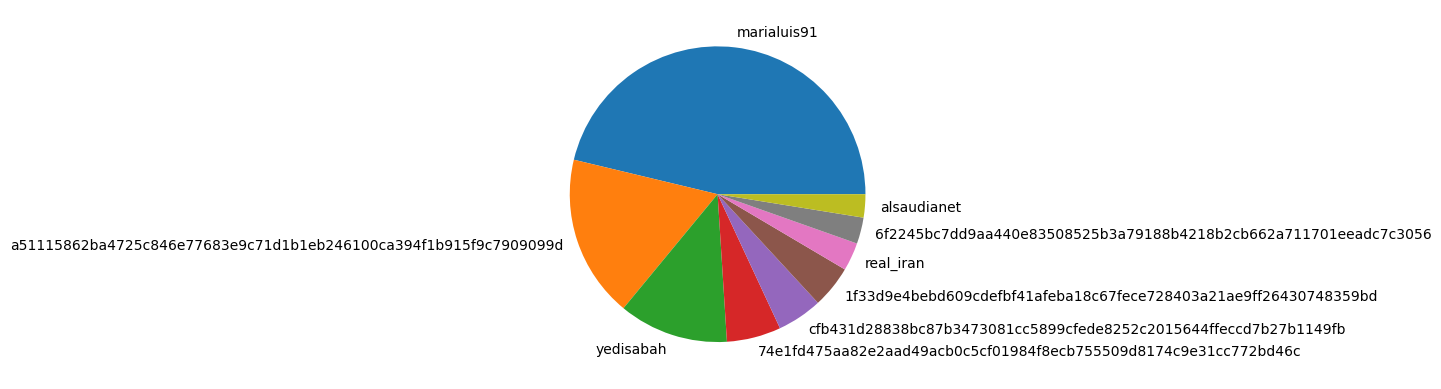

In [33]:
plt.pie(ranked_names_top10["count"], labels=ranked_names_top10["user_screen_name"])


##### Multiple charts

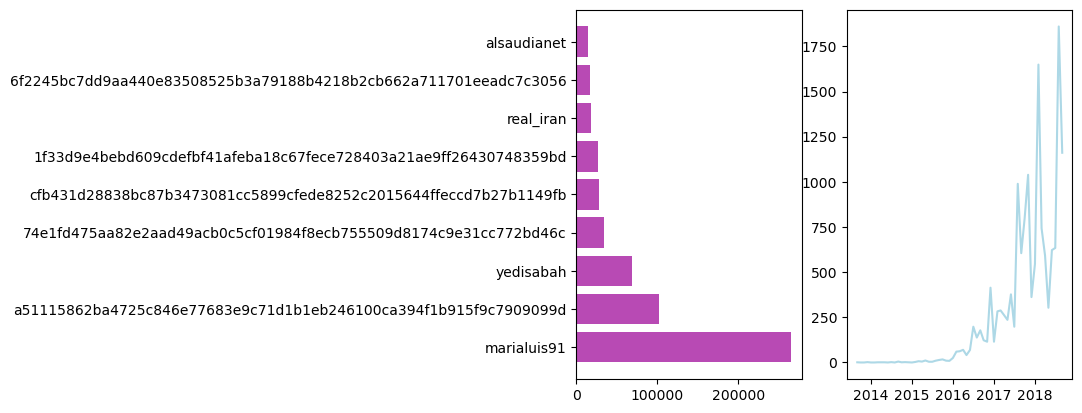

In [36]:
fig,ax =  plt.subplots(1,2)
ax[0].barh( ranked_names_top10["user_screen_name"],  ranked_names_top10["count"], color = '#b84ab4')
ax[1].plot(monthly_tweet_count, color='lightblue')


#### Saving your charts

In [ ]:
plt.plot(monthly_tweet_count)
plt.savefig('../output/chart.svg')
plt.savefig('../output/chart.png')